In [1]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
exp_names = ["figaro", "mkl"]
exp_paths = {"figaro": "comparisons/performance/figaro", "mkl": "comparisons/performance/python/numpy"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]

start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

xlsx_name = "time.xlsx"

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:
        #gather_times_path = os.path.join(perf_path, db_name + xlsx_name)
        #print(gather_times_path)
        #out_workbook = Workbook()
        #out_workbook.remove(out_workbook.active)
        #out_sheet = out_workbook.create_sheet("Times")

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_xlsx = os.path.join(perf_path, db_name_per, xlsx_name)
            workbook = load_workbook(filename=path_xlsx, data_only=True)
            sheet = workbook.active
            row_count = sheet.max_row
            col_idx = db_idx + 1
            col_letter = get_column_letter(col_idx)
            
            #out_sheet.cell(row=1, column=col_idx).value = db_name_per
            
            start_row_idx = 2
            np_measures = np.zeros(num_measurement)
            for row_idx_dst in range(start_row_idx, start_row_idx + num_measurement):
                offset_idx = row_idx_dst - start_row_idx
                row_idx_src = row_count - num_measurement  + offset_idx
                val = sheet.cell(row=row_idx_src, column=2).value
                np_measures[offset_idx] = float(val)
                #print(idx_shift, db_idx)
                #out_sheet.cell(row=row_idx_dst, column=col_idx).value = val
            
            #out_sheet.cell(row=start_row_idx + num_measurement, column=col_idx).value = '=AVERAGE({}{}:{}{})'.format(col_letter, start_row_idx + 1, 
            #        col_letter,6)

            time_avg = np.mean(np_measures[1:])
            df_measurement.at[percent, db_name] = time_avg
            
        #out_workbook.save(gather_times_path)
        print(df_measurement)
        
    df_measurement_exps[exp_name] = df_measurement





/local/scratch/Figaro/figaro-code/comparisons/performance/figaro/DBRetailertime.xlsx
    DBRetailer DBFavorita DBYelp
10     1.02255        NaN    NaN
20     1.88377        NaN    NaN
30     2.56585        NaN    NaN
40     3.60763        NaN    NaN
50     4.13936        NaN    NaN
60      5.0589        NaN    NaN
70     5.82651        NaN    NaN
80     6.91206        NaN    NaN
90     7.64218        NaN    NaN
100    8.79837        NaN    NaN
/local/scratch/Figaro/figaro-code/comparisons/performance/figaro/DBFavoritatime.xlsx
    DBRetailer DBFavorita DBYelp
10     1.02255   0.620214    NaN
20     1.88377    1.32695    NaN
30     2.56585    1.90418    NaN
40     3.60763    2.47664    NaN
50     4.13936    3.17174    NaN
60      5.0589    3.78779    NaN
70     5.82651    4.45998    NaN
80     6.91206    5.02968    NaN
90     7.64218     5.5227    NaN
100    8.79837    6.22367    NaN
/local/scratch/Figaro/figaro-code/comparisons/performance/figaro/DBYelptime.xlsx
    DBRetailer DBFavori

{'figaro':     DBRetailer DBFavorita     DBYelp
10     1.02255   0.620214  0.0696112
20     1.88377    1.32695     0.1516
30     2.56585    1.90418   0.174428
40     3.60763    2.47664    0.16887
50     4.13936    3.17174   0.213451
60      5.0589    3.78779   0.253233
70     5.82651    4.45998   0.328887
80     6.91206    5.02968   0.350437
90     7.64218     5.5227   0.418479
100    8.79837    6.22367   0.463665, 'mkl':     DBRetailer DBFavorita   DBYelp
10     6.37502     7.1842  12.9659
20     12.4169    12.1102  25.5079
30     18.7808    18.1728  39.8227
40     24.6571    25.4012  50.6059
50     30.0259    32.3596  63.6036
60     36.2344    39.5569  74.7583
70     42.2087    47.7439  95.4524
80     46.3543    53.9141  113.633
90     54.9491    58.1572    160.1
100    59.5091    71.2533  171.045}
figaro
10     1.02255
20     1.88377
30     2.56585
40     3.60763
50     4.13936
60      5.0589
70     5.82651
80     6.91206
90     7.64218
100    8.79837
Name: DBRetailer, dtype: object

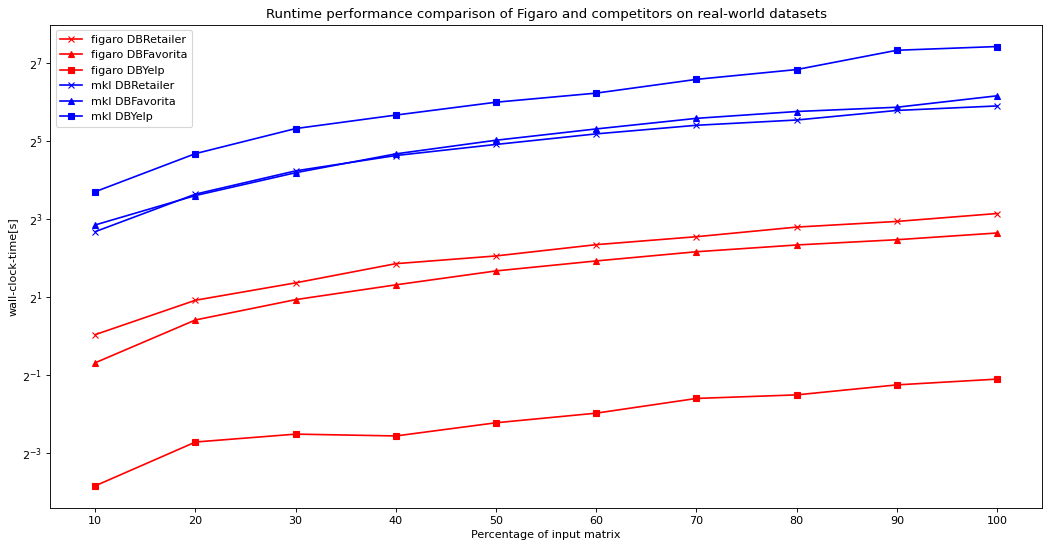

In [2]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=2)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro": "r", "mkl": "b"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        print(df_measurement[db_name])
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name))
plt.legend(loc="upper left")

plt.show()